<a href="https://colab.research.google.com/github/nabilakartika/RecomendationMovie/blob/main/Netflix_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMBIL DATA DARI KAGGLE

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"nabilakartika","key":"d49ea2cd01f7b54a45d0e9f28d2a8e80"}'}

In [ ]:
# Konfigurasi
import os
import shutil

# Buat direktori .kaggle di home
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan file kaggle.json ke direktori .kaggle
shutil.move('kaggle (3).json', '/root/.kaggle/kaggle.json')

# Ubah izin untuk file kaggle.json
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
#Download dataset
!kaggle datasets download -d rahulvyasm/netflix-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows
License(s): CC0-1.0
 74% 1.00M/1.35M [00:00<00:00, 1.51MB/s]
100% 1.35M/1.35M [00:00<00:00, 1.91MB/s]


In [ ]:
import zipfile

# Ekstrak file zip
with zipfile.ZipFile('/content/netflix-movies-and-tv-shows.zip', 'r') as zip_ref:
    zip_ref.extractall('netflix-movies-and-tv-shows')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='ISO-8859-1')
df.tail(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
8789,s8790,Movie,You Changed My Life,Cathy Garcia-Molina,"John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...",Philippines,"February 27, 2019",2009,TV-PG,116 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8792,s8793,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,"November 1, 2016",1973,NR,81 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8794,s8795,Movie,Ø§Ø´ØªØ¨Ø§Ù,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8796,s8797,TV Show,Yunus Emre,NaN,"GÃ¶khan Atalay, Payidar TÃ¼fekÃ§ioglu, Baran A...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(8809, 12)

In [ ]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [ ]:
df.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                   'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                   'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
                   'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.to_csv('/content/drive/MyDrive/DibimbingFP/netflix_edited.csv', index=False)

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/DibimbingFP/netflix_edited.csv')
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [ ]:
df1['director'].fillna('Unknown', inplace=True)
df1['cast'].fillna('Unknown', inplace=True)
df1['country'].fillna('Unknown', inplace=True)

In [ ]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [ ]:
df1.to_csv('/content/drive/MyDrive/DibimbingFP/newdata_netflix.csv', index=False)

# MELIHAT PERKEMBANGAN FILM YANG DIRILIS DARI TAHUN KE TAHUN

Skewness of release_year: -3.445856941898833


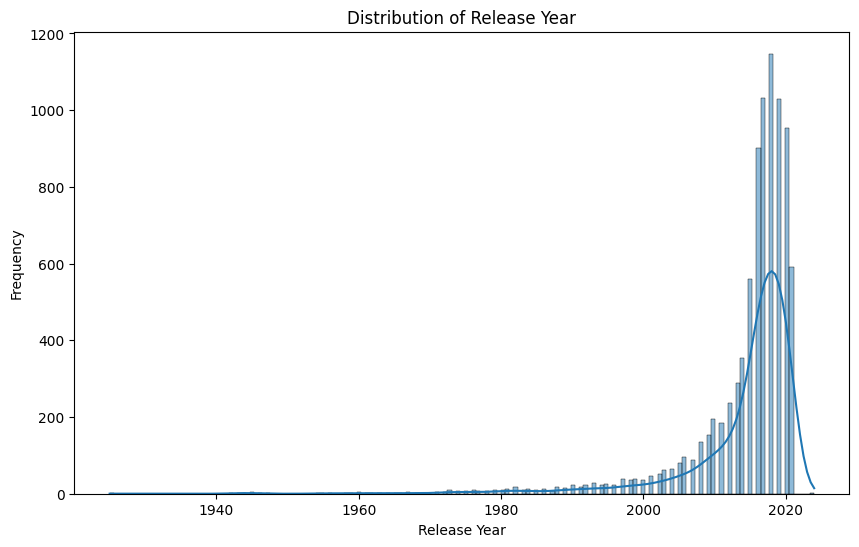

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Menghitung skewness untuk kolom 'release_year'
release_year_skewness = skew(df1['release_year'].dropna())
print(f"Skewness of release_year: {release_year_skewness}")

plt.figure(figsize=(10, 6))
sns.histplot(df1['release_year'].dropna(), kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Menghitung jumlah rilis per genre setiap tahun
# Convert 'listed_in' column to string type
df1['listed_in'] = df1['listed_in'].astype(str)

# Now split the genre
df1['listed_in'] = df1['listed_in'].str.split(', ')

# Membuat kolom genre
df_exploded = df1.explode('listed_in')
genre_year_count = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
genre_year_sorted = genre_year_count.sort_values(by=['release_year', 'count'], ascending=[True, False])

print(genre_year_sorted)

      release_year             listed_in  count
0             1925              TV Shows      1
1             1942        Classic Movies      2
2             1942         Documentaries      2
4             1943         Documentaries      3
3             1943        Classic Movies      1
...            ...                   ...    ...
1167          2021  Faith & Spirituality      2
1191          2021              TV Shows      2
1195          2024                Action      1
1196          2024                Horror      1
1197          2024                Sci-fi      1

[1198 rows x 3 columns]


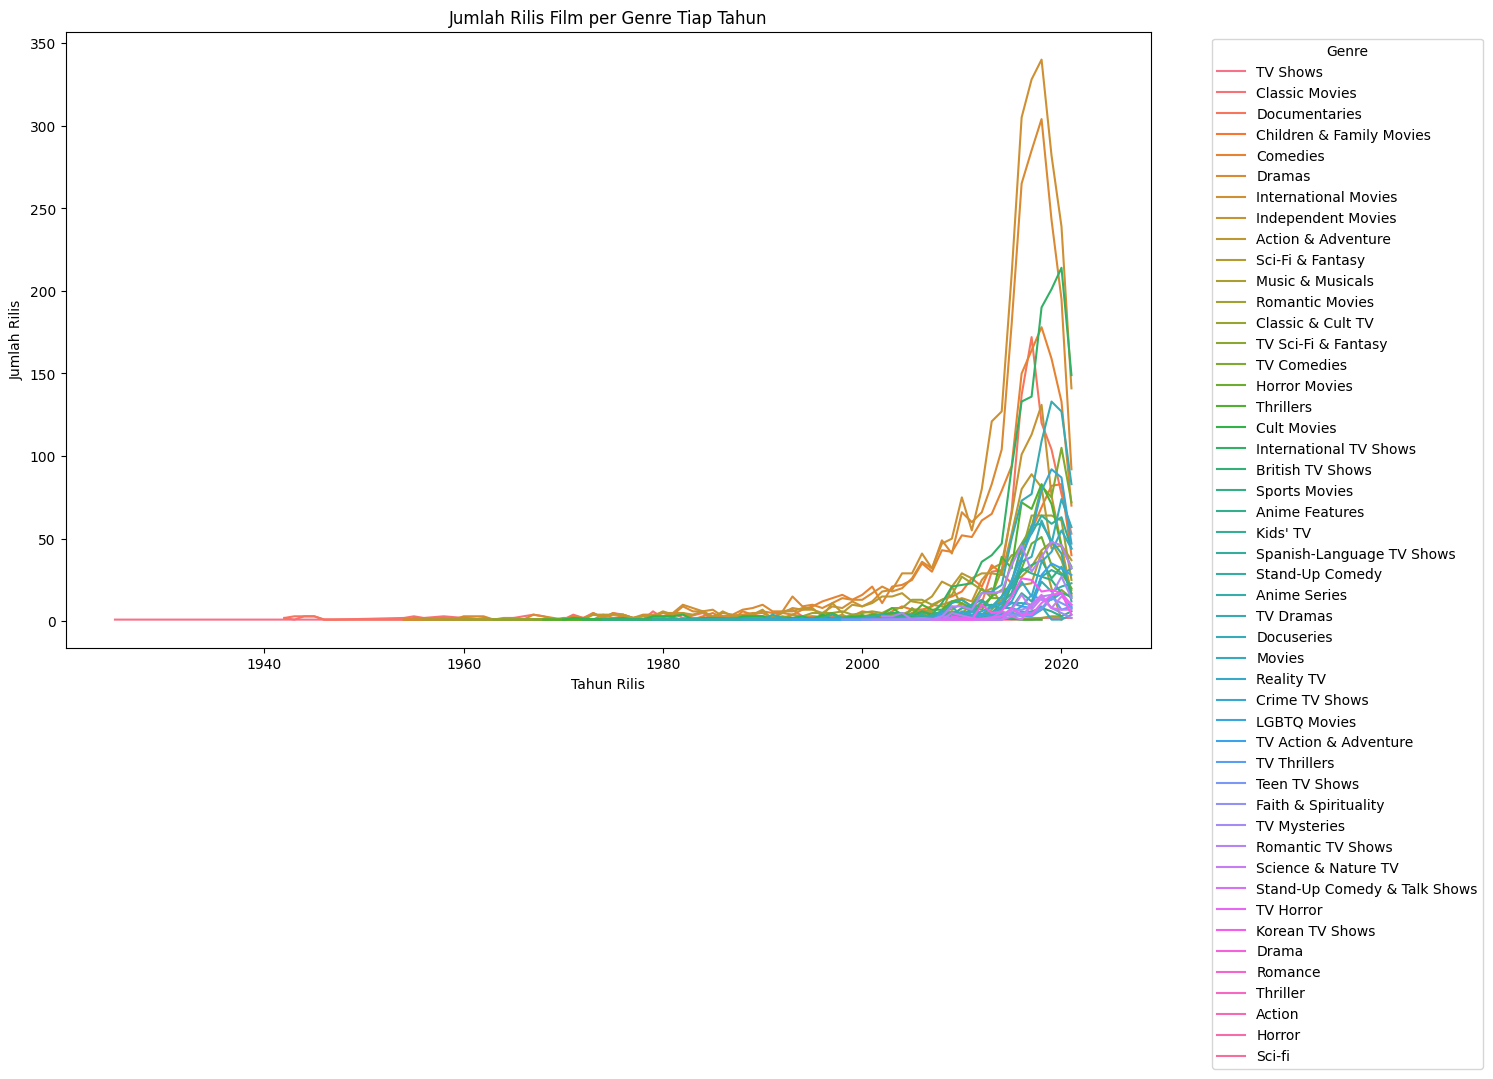

In [ ]:
# Visualisasi: Menampilkan tren genre dari tahun ke tahun
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_year_sorted, x='release_year', y='count', hue='listed_in')
plt.title('Jumlah Rilis Film per Genre Tiap Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Rilis')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

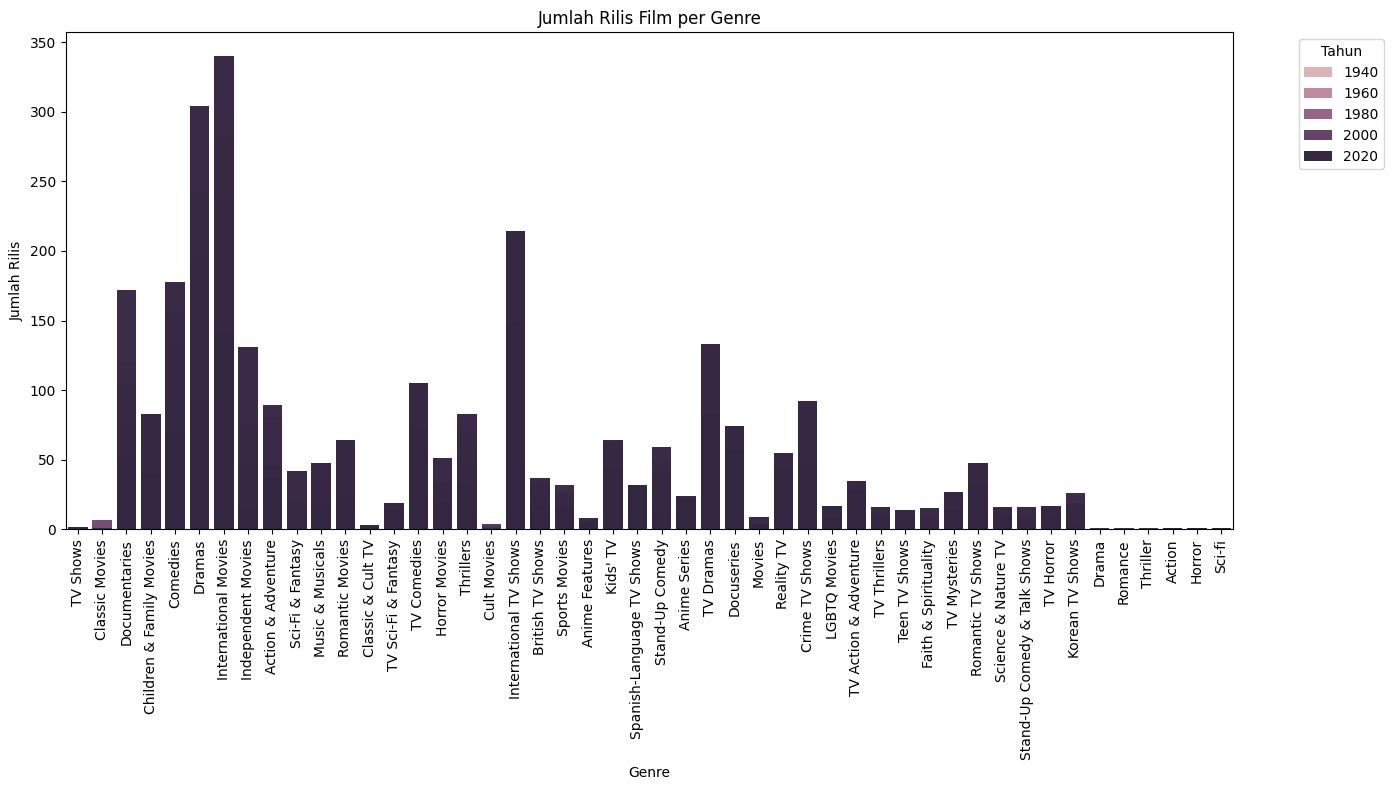

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=genre_year_sorted, x='listed_in', y='count', hue='release_year', dodge=False)

# Set the title and labels
plt.title('Jumlah Rilis Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Rilis')
plt.xticks(rotation=90)
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Mengetahui 20 genre yang paling banyak dirilis
genre_counts = genre_year_sorted.groupby('listed_in')['count'].sum()
top_20_genres = genre_counts.nlargest(20)

print(top_20_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


In [ ]:
# Mengetahui genre yang paling banyak dirilis berdasarkan tahun
genre_year_counts = genre_year_sorted.groupby(['listed_in', 'release_year'])['count'].sum()
most_released_genre_year = genre_year_counts.idxmax()
genre_terbanyak, tahun_terbanyak = most_released_genre_year
jumlah_rilis_terbanyak = genre_year_counts.max()

print("Genre yang paling banyak dirilis:", genre_terbanyak)
print("Tahun:", tahun_terbanyak)
print("Jumlah rilis:", jumlah_rilis_terbanyak)


Genre yang paling banyak dirilis: International Movies
Tahun: 2018
Jumlah rilis: 340


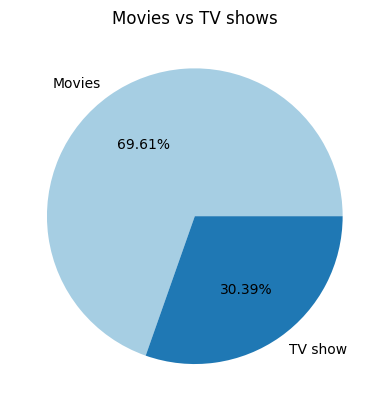

In [ ]:
# MANA YANG LEBIH BANYAK DIRILIS? MOVIE or TV SHOW?
size = df1['type'].value_counts()
labels = 'Movies', 'TV show'
color = sns.color_palette('Paired')

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Movies vs TV shows')
plt.show()

In [ ]:
movies = df1[df1['type'] == 'Movie']
tvshows = df1[df1['type'] == 'TV Show']

**NEGARA MANA YANG MERILIS MOVIE/TV SHOW PALING BANYAK??**

In [ ]:
def count_productions(df1):
    country_series = df1['country'].dropna().str.split(', ').explode()
    return country_series.value_counts()

# Movie
movies_counts = count_productions(movies)
print("Countries with the most films produced on Netflix:")
print(movies_counts.head(10), "\n")

# TV Shows
tvshows_counts = count_productions(tvshows)
print("Countries with the most TV shows produced on Netflix:")
print(tvshows_counts.head(10), "\n")

# Total produksi per negara
total_counts = count_productions(df1)
print("Countries with the most products on Netflix:")
print(total_counts.head(10), "\n")


Countries with the most films produced on Netflix:
country
United States     2752
India              962
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: count, dtype: int64 

Countries with the most TV shows produced on Netflix:
country
United States     938
Unknown           391
United Kingdom    272
Japan             199
South Korea       171
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Name: count, dtype: int64 

Countries with the most products on Netflix:
country
United States     3690
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
South Korea        232
Spain              232
Germany            226
Name: count, dtype: int64 



**MOST POPULAR DIRECTOR**

In [ ]:
def count_directors(df1):
    director_series = df1['director'].dropna().str.split(', ').explode()
    return director_series.value_counts()

# Movie
movie_directors = count_directors(movies)
print("Most popular movie directors on Netflix:")
print(movie_directors.head(10), "\n")

# TV Show
tvshow_directors = count_directors(tvshows)
print("Most popular TV show directors on Netflix:")
print(tvshow_directors.head(10), "\n")

Most popular movie directors on Netflix:
director
Unknown                188
Rajiv Chilaka           22
Jan Suter               21
RaÃºl Campos            19
Suhas Kadav             16
Jay Karas               15
Marcus Raboy            15
Cathy Garcia-Molina     13
Jay Chapman             12
Martin Scorsese         12
Name: count, dtype: int64 

Most popular TV show directors on Netflix:
director
Unknown                  2446
Alastair Fothergill         3
Ken Burns                   3
Iginio Straffi              2
Gautham Vasudev Menon       2
Hsu Fu-chun                 2
Stan Lathan                 2
Joe Berlinger               2
Lynn Novick                 2
Rob Seidenglanz             2
Name: count, dtype: int64 



**PERILISAN TERBANYAK BERDASARKAN TAHUN**

In [ ]:
def count_by_year(df1):
    year_added = df1['date_added'].dropna().apply(lambda x: x[-4:])
    return year_added.value_counts()

# Movie
myear = count_by_year(movies)
print("Years with the most movies added to Netflix:")
print(myear.head(), "\n")

# TV Show
tvyear = count_by_year(tvshows)
print("Years with the most TV shows added to Netflix:")
print(tvyear.head())


Years with the most movies added to Netflix:
date_added
2019    1424
2020    1284
2018    1237
2021     993
2017     839
Name: count, dtype: int64 

Years with the most TV shows added to Netflix:
date_added
2020    595
2019    592
2021    505
2018    412
2017    349
Name: count, dtype: int64


In [ ]:
# Fungsi untuk menghitung jumlah penambahan film dan acara TV per tahun
def count_by_year(df):
    year_added = df['date_added'].dropna().apply(lambda x: x[-4:])
    return year_added.value_counts()

# Filter data untuk film
movies_by_year = count_by_year(movies)
print("Years with the most movies added to Netflix:")
print(movies_by_year.head(1))  # Tampilkan tahun dengan jumlah penambahan film terbanyak

# Filter data untuk acara TV
tvshows_by_year = count_by_year(tvshows)
print("\nYears with the most TV shows added to Netflix:")
print(tvshows_by_year.head(1))  # Tampilkan tahun dengan jumlah penambahan acara TV terbanyak


Years with the most movies added to Netflix:
date_added
2019    1424
Name: count, dtype: int64

Years with the most TV shows added to Netflix:
date_added
2020    595
Name: count, dtype: int64


**DURASI**

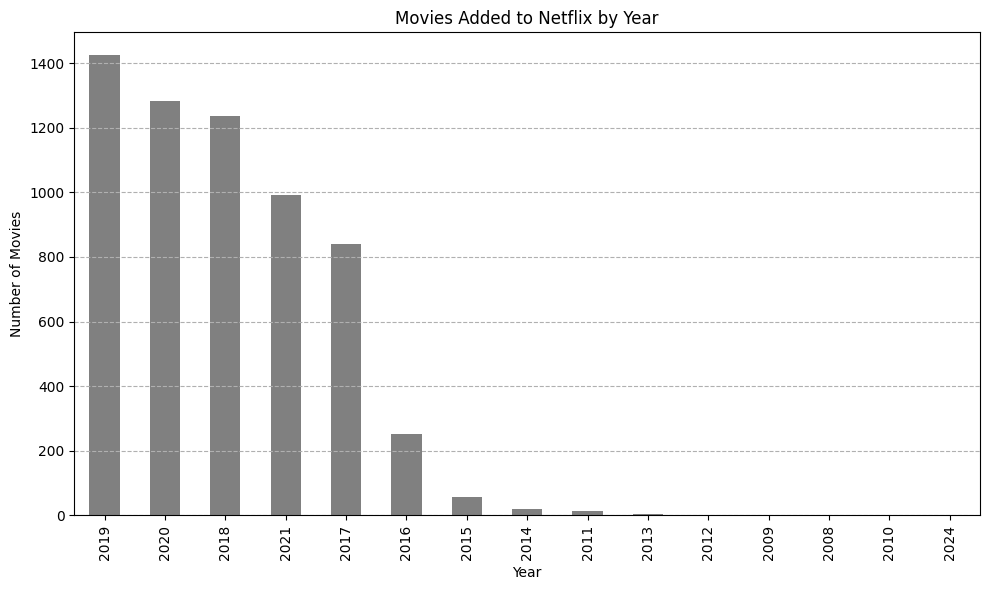

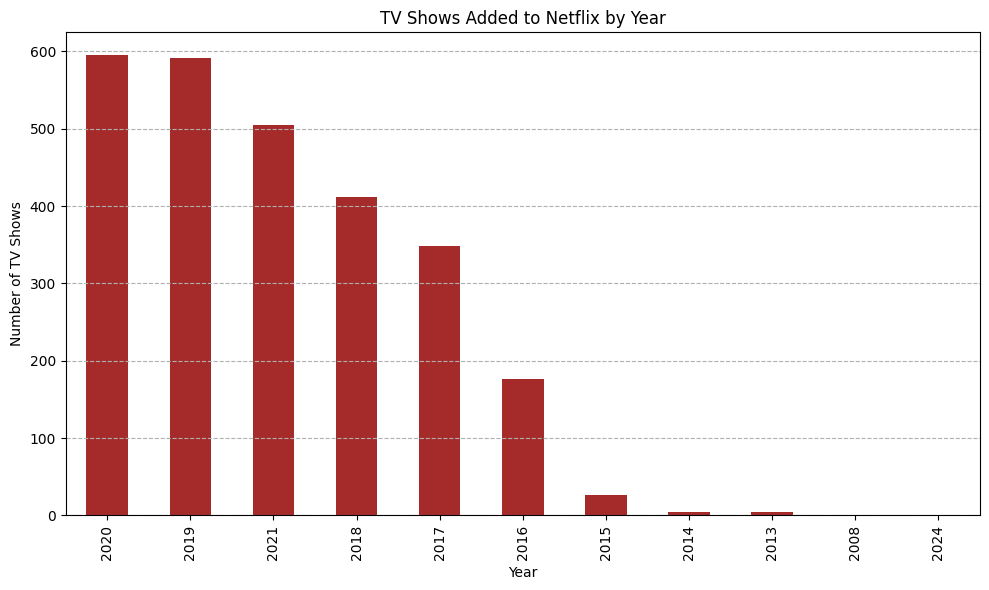

In [ ]:
def count_by_year(df1):
    year_added = df1['date_added'].dropna().apply(lambda x: x[-4:])
    return year_added.value_counts()

movies_byyear = count_by_year(movies)
tvshows_byyear = count_by_year(tvshows)

# Plot untuk film
plt.figure(figsize=(10, 6))
movies_by_year.plot(kind='bar', color='grey')
plt.title('Movies Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Plot untuk acara TV
plt.figure(figsize=(10, 6))
tvshows_by_year.plot(kind='bar', color='brown')
plt.title('TV Shows Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


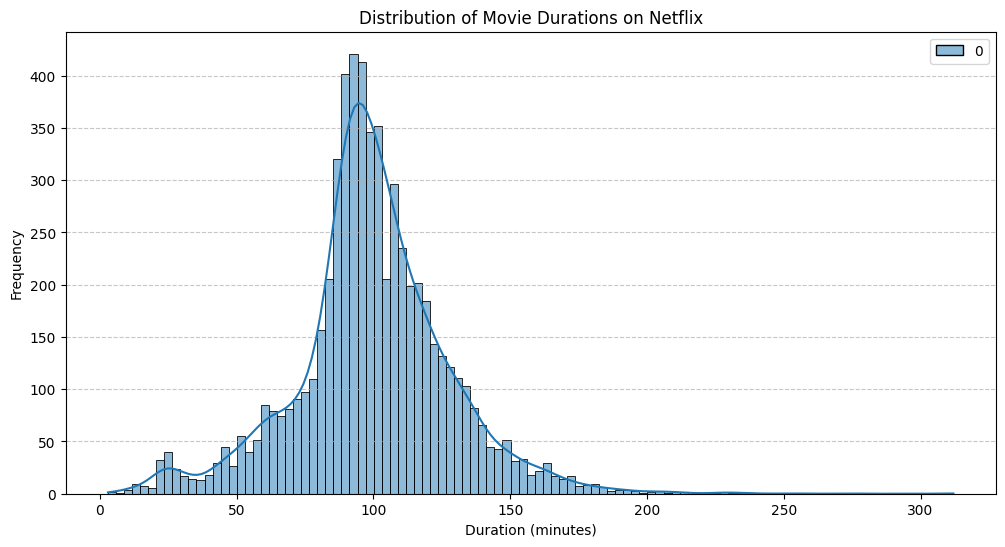

In [ ]:
# MOVIE DURATIONS
movie = df1[df1['type'] == 'Movie']

# Ekstrak dalam menit
movie_duration = movie['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12, 6))
sns.histplot(data=movie_duration, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

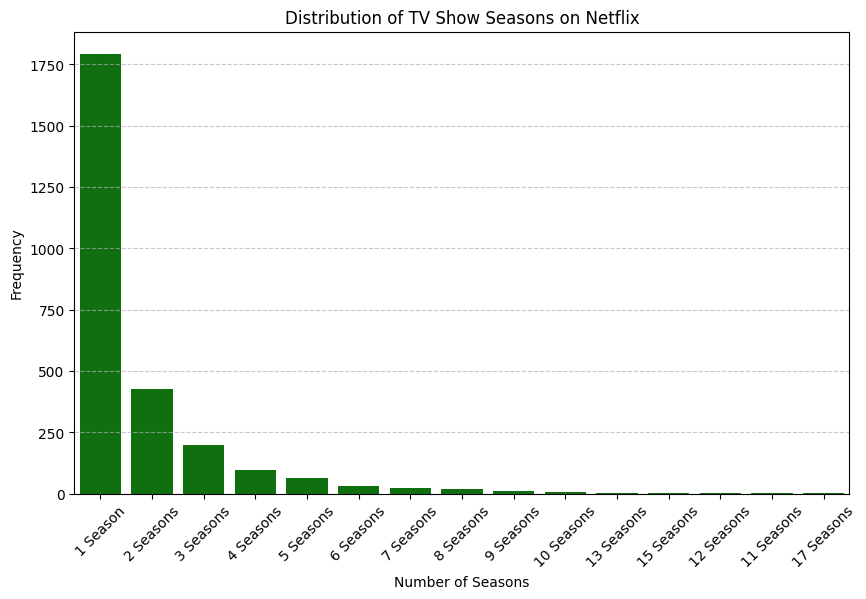

In [ ]:
# TV Show season
tvshows_df = df1[df1['type'] == 'TV Show']

tvshow_seasons = tvshows_df['duration'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=tvshow_seasons.index, y=tvshow_seasons.values, color='green')
plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**RATING**

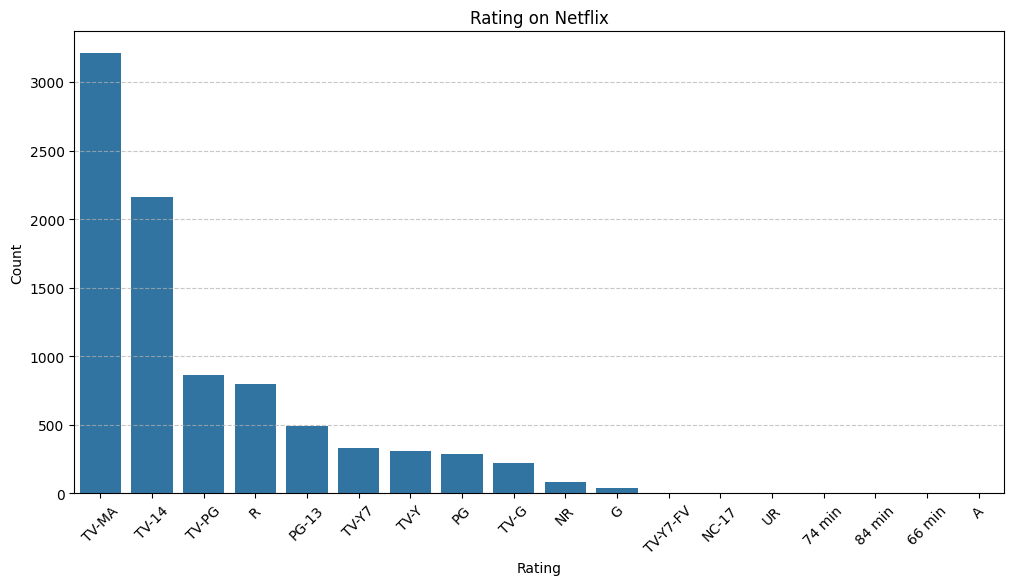

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='rating', order=df1['rating'].value_counts().index)
plt.title('Rating on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# DNN

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
df_netflix = pd.read_csv('/content/drive/MyDrive/DibimbingFP/newdata_netflix.csv')
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,['Documentaries'],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"['International TV Shows', 'TV Dramas', 'TV My...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"['Crime TV Shows', 'International TV Shows', '...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"['Docuseries', 'Reality TV']","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"['International TV Shows', 'Romantic TV Shows'...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"['Comedies', 'Horror Movies']",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"['Children & Family Movies', 'Comedies']","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"['Dramas', 'International Movies', 'Music & Mu...",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"['Sci-fi', 'Horror', 'Action']",A new breed of parasitic aliens arrive on Eart...


In [ ]:
# Membuat userId
np.random.seed(42)
num_users = 8809
df_netflix['userId'] = np.random.randint(1, num_users + 1, df_netflix.shape[0])

In [ ]:
# Membuat movieId
df_netflix['movieId'] = df_netflix['show_id'].astype('category').cat.codes

Karena rating dari data tidak bisa digunakan, maka dibuat sendiri colom rating_new dalam bentuk angka sehingga dapat digunakan sebagai rekomendasi

In [23]:
df_netflix['rating_new'] = np.random.randint(1, 5, df_netflix.shape[0])

In [98]:
train, test = train_test_split(df_netflix[['userId', 'movieId', 'rating_new']], test_size=0.2, random_state=42)

In [99]:
num_users = df_netflix['userId'].max()
num_movies = df_netflix['movieId'].max()

In [100]:
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

def build_model(num_users, num_movies, embedding_size=100):
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding', embeddings_regularizer=l2(0.001))(user_input)
    movie_embedding = Embedding(input_dim=num_movies + 1, output_dim=embedding_size, name='movie_embedding', embeddings_regularizer=l2(0.001))(movie_input)

    user_flatten = Flatten()(user_embedding)
    movie_flatten = Flatten()(movie_embedding)

    concat = Concatenate()([user_flatten, movie_flatten])

    dense = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(concat)
    dense = Dropout(0.7)(dense)
    dense = BatchNormalization()(dense)
    dense = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(dense)
    dense = Dropout(0.7)(dense)
    dense = BatchNormalization()(dense)
    #dense = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dense)
    #dense = Dropout(0.7)(dense)
    output = Dense(1, activation='linear')(dense)

    model = Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model


In [101]:
num_users = df_netflix['userId'].max()
num_movies = df_netflix['movieId'].max()

model = build_model(num_users, num_movies, embedding_size=50)

In [102]:
history = model.fit(
    [train['userId'], train['movieId']], train['rating_new'],
    epochs=20,
    batch_size=16,
    validation_data=([test['userId'], test['movieId']], test['rating_new'])
)

Epoch 1/20
441/441 [==============================] - 8s 14ms/step - loss: 4.0945 - val_loss: 1.5689
Epoch 2/20
441/441 [==============================] - 5s 12ms/step - loss: 2.1509 - val_loss: 1.6705
Epoch 3/20
441/441 [==============================] - 9s 20ms/step - loss: 1.9379 - val_loss: 1.7305
Epoch 4/20
441/441 [==============================] - 5s 12ms/step - loss: 1.8533 - val_loss: 1.7810
Epoch 5/20
441/441 [==============================] - 7s 17ms/step - loss: 1.7662 - val_loss: 1.8597
Epoch 6/20
441/441 [==============================] - 6s 14ms/step - loss: 1.5519 - val_loss: 2.0161
Epoch 7/20
441/441 [==============================] - 7s 15ms/step - loss: 1.2954 - val_loss: 1.8907
Epoch 8/20
441/441 [==============================] - 6s 14ms/step - loss: 1.1325 - val_loss: 1.8550
Epoch 9/20
441/441 [==============================] - 5s 12ms/step - loss: 1.0134 - val_loss: 1.8328
Epoch 10/20
441/441 [==============================] - 7s 16ms/step - loss: 0.9440 - val_lo

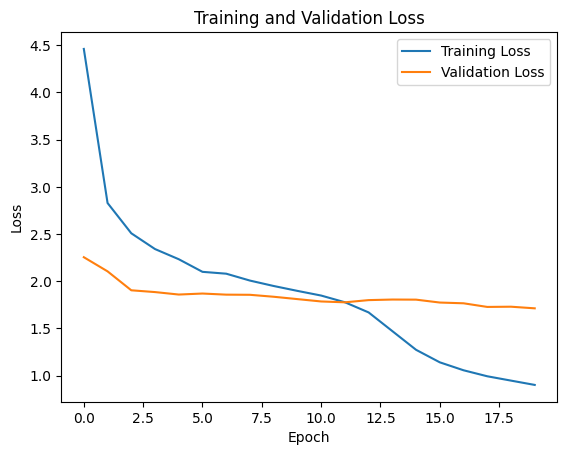

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_squared_error
import numpy as np

predictions = model.predict([test['userId'], test['movieId']])

accuracy = accuracy_score(test['rating_new'], np.round(predictions))
f1 = f1_score(test['rating_new'], np.round(predictions), average='micro')
recall = recall_score(test['rating_new'], np.round(predictions), average='micro')
rmse = np.sqrt(mean_squared_error(test['rating_new'], predictions))
mse = mean_squared_error(test['rating_new'], predictions)
mape = np.mean(np.abs((test['rating_new'].values.flatten() - predictions.flatten()) / test['rating_new'].values.flatten())) * 100

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

56/56 [==============================] - 0s 2ms/step
Accuracy: 0.2593643586833144
F1 Score: 0.2593643586833144
Recall: 0.2593643586833144
RMSE: 1.1719307256940392
MSE: 1.3734216258257574
MAPE: 62.304348636995066
